In [ ]:
import pandas as pd

# 定義列名
col_names = [
    'src_port', 
    'dst_port', 
    'bidirectional_first_seen_ms', 
    'bidirectional_last_seen_ms', 
    'bidirectional_bytes', 
    'bidirectional_duration_ms',
    'target'
]

# 設置 CSV 文件路徑 
file_path = r'C:\Users\user\OneDrive\文件\畢業專題\csv\Pbyte nfyt(music).csv'
# 讀取 CSV 文件
net = pd.read_csv(file_path, header=None, names=col_names, low_memory=False)

# 去掉第一行（因為第一行現在是數據行而不是列標題）
net = net.iloc[1:, :]

# 顯示前幾行數據
net.head()


,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,bidirectional_duration_ms,target
1,62311,443,1.72344E+12,1.72344E+12,7877,1520,0
2,443,61234,1.72344E+12,1.72344E+12,10612422,107773,1
3,443,61233,1.72344E+12,1.72344E+12,7285583,107771,1
4,49440,443,1.72344E+12,1.72344E+12,434,263,0
5,61216,443,1.72344E+12,1.72344E+12,438,167,0


In [77]:
# 設置 CSV 文件路徑
file_path_2 = r'C:\Users\user\OneDrive\文件\畢業專題\csv\Pbyte onehour nfyt(music)web.csv'

# 讀取 CSV 文件
net2 = pd.read_csv(file_path_2, header=None, names=col_names, low_memory=False)

# 去掉第一行（因為第一行現在是數據行而不是列標題）
net2 = net2.iloc[1:, :]

# 顯示前幾行數據
net2.head()

,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,bidirectional_duration_ms,target
1,49440,443,1.72346E+12,1.72346E+12,438,251,0
2,49440,443,1.72347E+12,1.72347E+12,438,293,0
3,49440,443,1.72347E+12,1.72347E+12,438,250,0
4,443,61757,1.72346E+12,1.72346E+12,438,127,0
5,443,61763,1.72346E+12,1.72346E+12,294,29,0


In [78]:

num_elements = len(net)

num_elements2 = len(net2)
num_elements,num_elements2


(3029, 1076)

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#split dataset in features and target variable

feature_cols =['src_port', 'dst_port', 'bidirectional_first_seen_ms', 'bidirectional_last_seen_ms','bidirectional_duration_ms',  'bidirectional_bytes']
feature_cols2 = ['target']
X_data = net[feature_cols].values # Features
y = net['target'].values # Target variable

X2_data = net2[feature_cols].values # Features
y2 = net2['target'].values # Target variable

In [80]:
from sklearn.preprocessing import MinMaxScaler

# 創建 MinMaxScaler 實例
scaler = MinMaxScaler(feature_range=(0, 100000))

# 將 X_data 轉換為 2D 數組，然後進行縮放
X_data_reshaped = X_data.reshape(-1, 1)
X = scaler.fit_transform(X_data_reshaped)

# 如果有第二個數據集 X2_data，重複同樣的步驟
X2_data_reshaped = X2_data.reshape(-1, 1)
X_data2 = scaler.fit_transform(X2_data_reshaped)


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100000))
X = scaler.fit_transform(X_data)
X_data2 = scaler.fit_transform(X2_data)

In [82]:
# 將 y 轉換為數值型
y = y.astype(int)
y2 = y2.astype(int)

SVM
Finished training for fold 1


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Finished training for fold 2
Finished training for fold 3


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Finished training for fold 4
Finished training for fold 5
Cross-validation scores on net1: [0.9603960396039604, 0.9075907590759076, 0.9075907590759076, 0.7178217821782178, 0.8677685950413223]
Average cross-validation score on net1: 0.8722335869950631


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


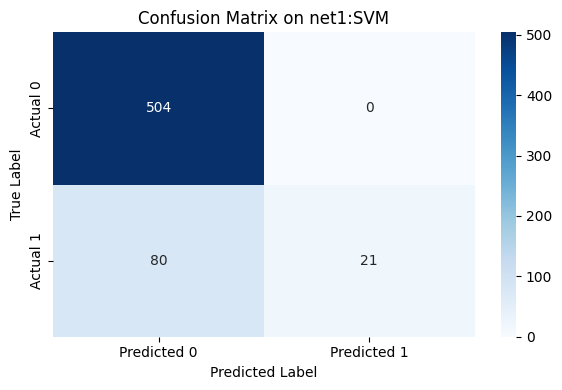

Accuracy on net2: 0.8550


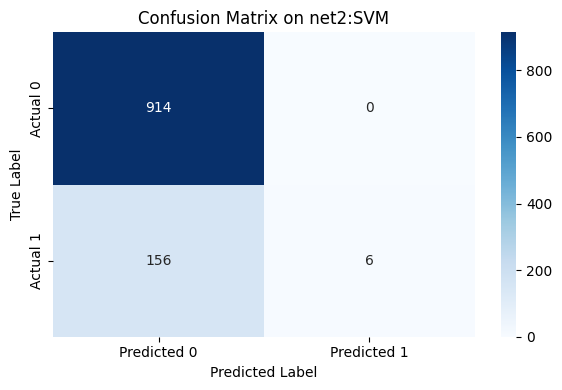

In [83]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("SVM")

# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 設定最大迭代次數為 1000 次，並將容忍度設定為 1e-4
clf = svm.SVC(kernel='linear', C=1 ,max_iter=100000, tol=1e-2)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []
# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    clf.fit(X_train, y_train)
    print(f"Finished training for fold {fold}")
    # 使用 net1 的驗證集進行測試
    y_pred_val = clf.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))


# 繪製 net1 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net1:SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = clf.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2:SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


LogisticRegression
Cross-validation scores on net1: [0.9603960396039604, 0.9207920792079208, 0.9042904290429042, 0.7194719471947195, 0.8677685950413223]
Average cross-validation score on net1: 0.8745438180181655
Accuracy on net2: 0.8643


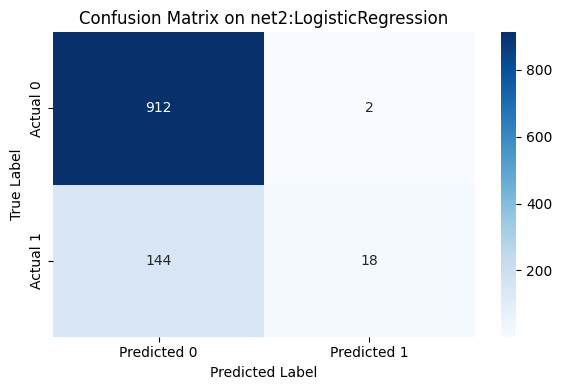

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"LogisticRegression")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 LogisticRegression 模型
logreg = LogisticRegression(solver='liblinear',max_iter=550)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    logreg.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = logreg.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = logreg.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2:LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


RandomForestClassifier
Cross-validation scores on net1: [0.9834983498349835, 0.9372937293729373, 0.976897689768977, 0.9966996699669967, 0.9636363636363636]
Average cross-validation score on net1: 0.9716051605160516
Accuracy on net2: 0.9452


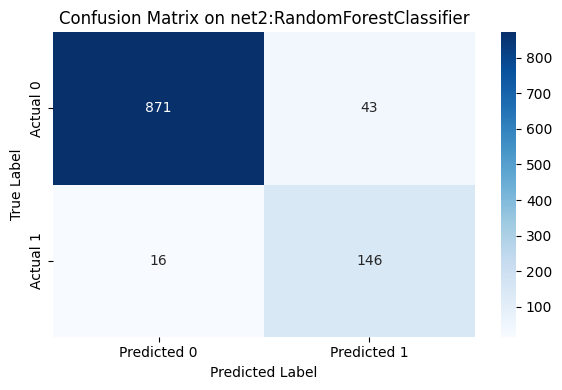

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"RandomForestClassifier")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 RandomForest 模型
randomForestModel = RandomForestClassifier(n_estimators=100,min_samples_leaf=1,max_features='sqrt')

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    randomForestModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = randomForestModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = randomForestModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2:RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


GaussianNB
Cross-validation scores on net1: [0.9537953795379538, 0.8943894389438944, 0.8927392739273927, 0.929042904290429, 0.628099173553719]
Average cross-validation score on net1: 0.8596132340506777
Accuracy on net2: 0.7872


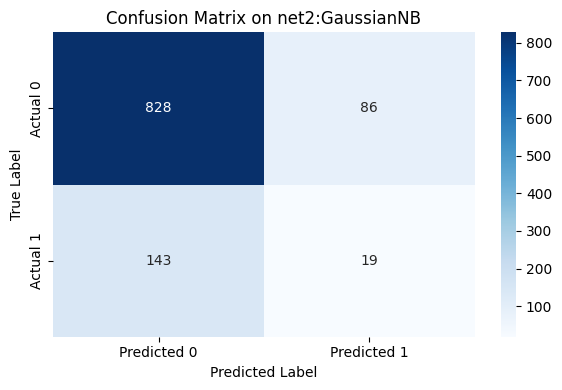

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"GaussianNB")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 GaussianNB 模型
GaussianNBModel = GaussianNB()


# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    GaussianNBModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = GaussianNBModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = GaussianNBModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2:GaussianNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


LinearDiscriminantAnalysisMOdel
Cross-validation scores on net1: [0.9537953795379538, 0.8745874587458746, 0.8877887788778878, 0.9273927392739274, 0.8479338842975207]
Average cross-validation score on net1: 0.8982996481466328
Accuracy on net2: 0.8625


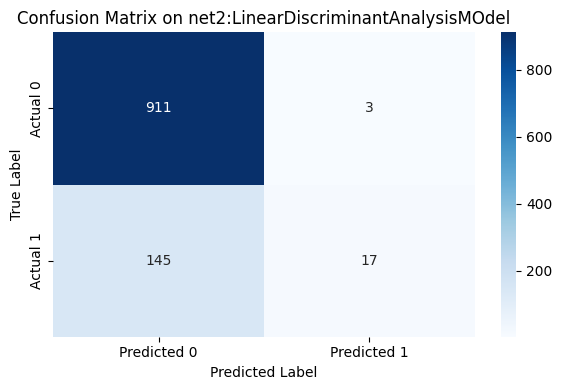

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"LinearDiscriminantAnalysisMOdel")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 LinearDiscriminantAnalysis 模型
LinearDiscriminantAnalysisMOdel= LinearDiscriminantAnalysis(n_components=1)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    LinearDiscriminantAnalysisMOdel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = LinearDiscriminantAnalysisMOdel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)
    
 
# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = LinearDiscriminantAnalysisMOdel.predict(X_data2)
    

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2:LinearDiscriminantAnalysisMOdel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


KNeighborsClassifier
Cross-validation scores on net1: [0.9389438943894389, 0.8498349834983498, 0.9075907590759076, 0.8085808580858086, 0.8446280991735537]
Average cross-validation score on net1: 0.8699157188446117
Accuracy on net2: 0.8559


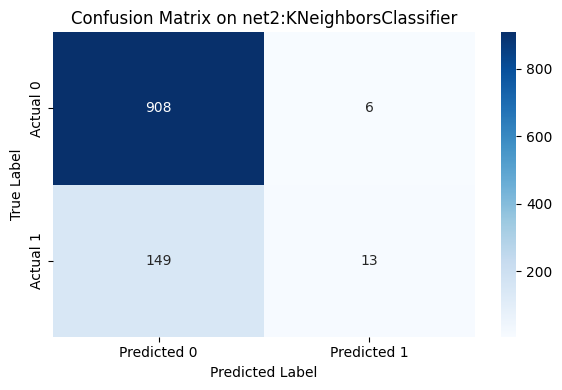

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"KNeighborsClassifier")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 KNeighbors 模型
KNeighborsClassifierModel= KNeighborsClassifier(n_neighbors=1)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    KNeighborsClassifierModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = KNeighborsClassifierModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = KNeighborsClassifierModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2:KNeighborsClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


DecisionTreeClassifier
Cross-validation scores on net1: [0.9933993399339934, 0.9620462046204621, 0.9917491749174917, 0.9785478547854786, 0.9371900826446281]
Average cross-validation score on net1: 0.9725865313804107
Accuracy on net2: 0.9210


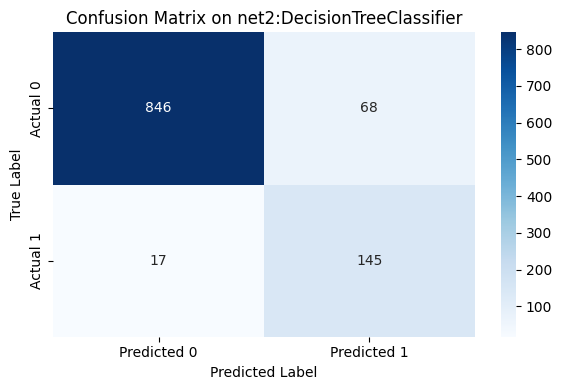

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"DecisionTreeClassifier")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 DecisionTreeClassifier 模型
DecisionTreeClassifierModel= DecisionTreeClassifier(random_state=0)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    DecisionTreeClassifierModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = DecisionTreeClassifierModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = DecisionTreeClassifierModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2:DecisionTreeClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy on net2 for SVM: 0.8550
Accuracy on net2 for Logistic Regression: 0.8643
Accuracy on net2 for Random Forest: 0.9414
Accuracy on net2 for GaussianNB: 0.7872
Accuracy on net2 for LDA: 0.8625
Accuracy on net2 for KNeighbors: 0.8559
Accuracy on net2 for Decision Tree: 0.9266


<Figure size 640x480 with 0 Axes>

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30050 (\N{CJK UNIFIED IDEOGRAPH-7562}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170:

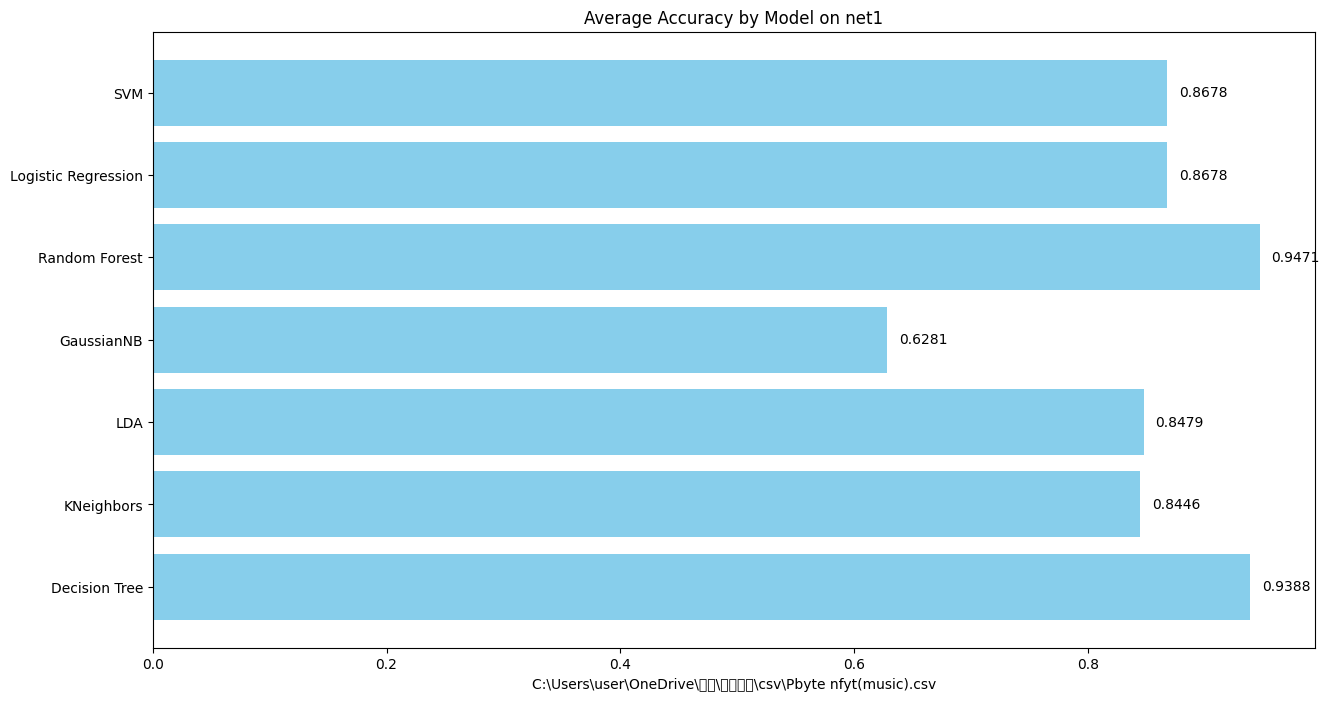

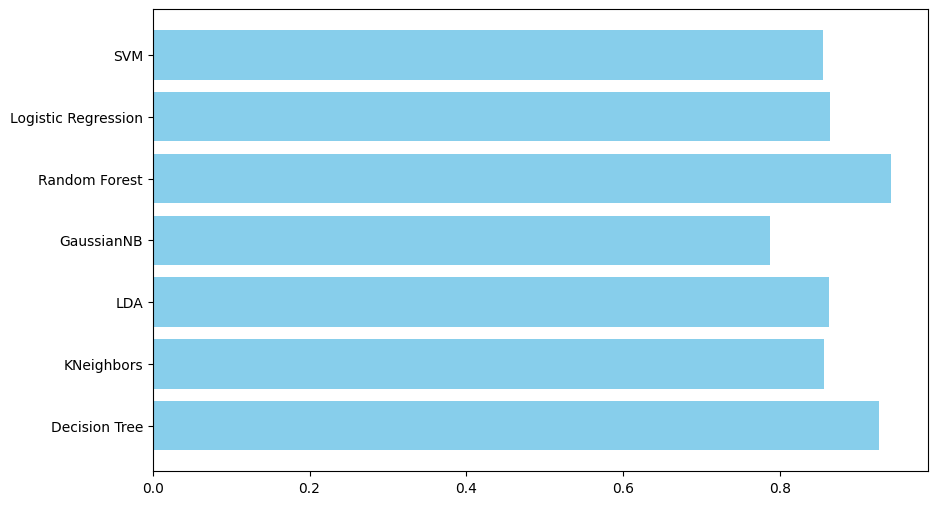

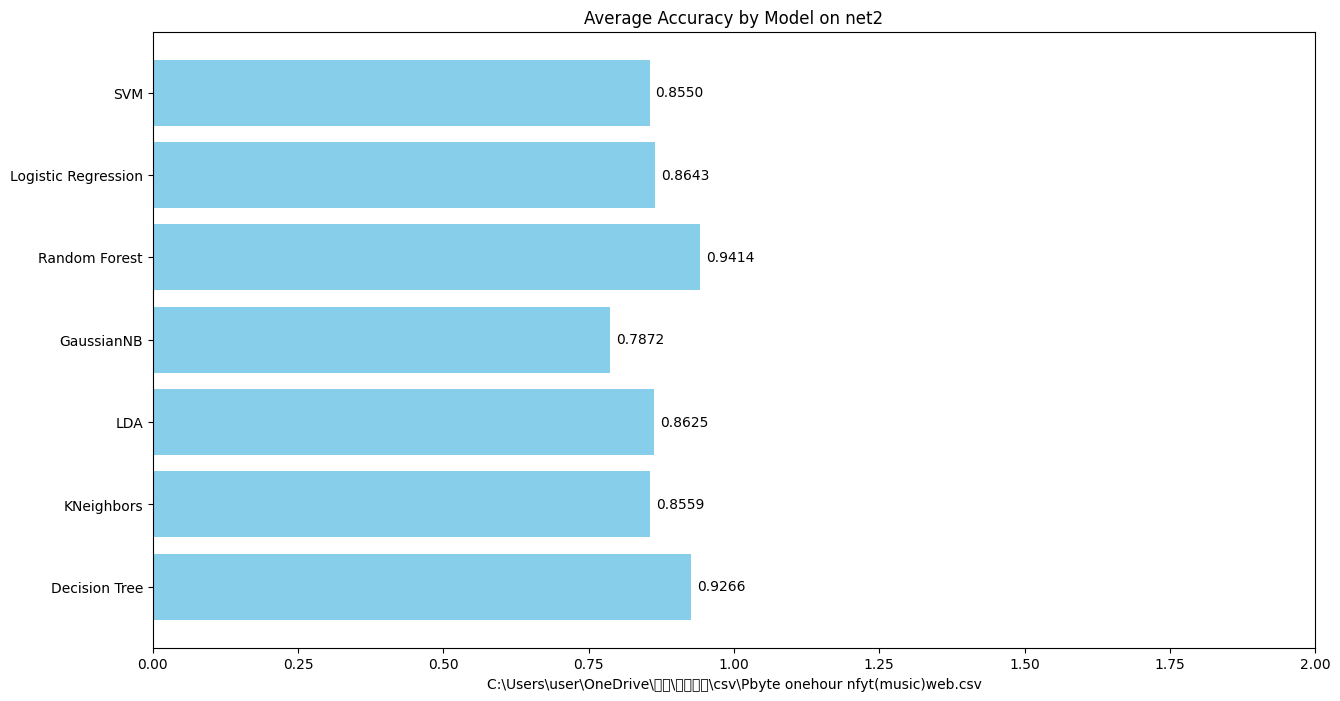

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm, linear_model, ensemble, neighbors, naive_bayes, discriminant_analysis, tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 假設 net1_X, net1_y 是 net1 數據集的特徵和標籤
# 假設 net2_X, net2_y 是 net2 數據集的特徵和標籤

# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 初始化模型
models = {
    "SVM":svm.SVC(kernel='linear', C=1 ,max_iter=100000, tol=1e-2),
    "Logistic Regression":LogisticRegression(solver='liblinear',max_iter=550),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "GaussianNB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(n_components=1),
    "KNeighbors":  KNeighborsClassifier(n_neighbors=1),
    "Decision Tree":DecisionTreeClassifier()
}
# 存儲每個模型在 net2 上的混淆矩陣和準確率
net2_cnf_matrices = {}
net_scores = {}
net2_scores = {}

# 訓練和測試每個模型
for name, model in models.items():
    
    
    # 存儲 KFold 結果
    cnf_matrices = []
    scores = []
    
    # 進行5折交叉驗證（僅在 net1 上分割）
    for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
        X_train, X_validation = X[train_indices], X[validation_indices]
        y_train, y_validation = y[train_indices], y[validation_indices]
        
        # 訓練模型
        model.fit(X_train, y_train)
        
        # 使用 net1 的驗證集進行測試
        y_pred_val = model.predict(X_validation)
        
        # 計算 net1 驗證集的準確率
        fold_accuracy = accuracy_score(y_validation, y_pred_val)
        scores.append(fold_accuracy)
        
        # 計算 net1 驗證集的混淆矩陣
        cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
        cnf_matrices.append(cnf_matrix_val)
    
    # 使用訓練好的模型對 net2 進行預測
    y_pred_net2 = model.predict(X_data2)
    
    # 計算 net2 上的準確率和混淆矩陣
    accuracy_net2 = accuracy_score(y2, y_pred_net2)
    cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])
    
    net_scores[name] = fold_accuracy
    net2_scores[name] = accuracy_net2
    net2_cnf_matrices[name] = cnf_matrix_net2
    
    print(f"Accuracy on net2 for {name}: {accuracy_net2:.4f}")


plt.tight_layout()
plt.show()


#按指定順序顯示模型
order = [  "Decision Tree","KNeighbors", "LDA","GaussianNB", "Random Forest","Logistic Regression","SVM" ]

# 繪製模型在 net1 上的準確率
plt.figure(figsize=(15, 8))
bars1 = plt.barh(order, [net_scores[name] for name in order], color='skyblue')
plt.xlabel('Average Accuracy on net1')
plt.xlabel(f'{file_path}')
plt.title('Average Accuracy by Model on net1')
# 在每個條形上顯示數字
for bar1 in bars1:
    width1 = bar1.get_width()
    plt.text(width1 + 0.01, bar1.get_y() + bar1.get_height() / 2, f'{width1:.4f}', va='center')

plt.show()
# 縮小圖形大小
plt.figure(figsize=(10, 6))
bars2 = plt.barh(order, [net2_scores[name] for name in order], color='skyblue')

# 繪製模型在 net2 上的準確率
plt.figure(figsize=(15, 8))
bars2 = plt.barh(order, [net2_scores[name] for name in order], color='skyblue')
plt.xlabel('Average Accuracy on net2')
plt.xlabel(f'{file_path_2}')

plt.title('Average Accuracy by Model on net2')

# 設置 x 軸起點從 0.4 開始
plt.xlim(0, 2.0)  # 1.0 是 x 軸的最大值，可以根據需要進行調整

# 在每個條形上顯示數字
for bar2 in bars2:
    width2 = bar2.get_width()
    plt.text(width2 + 0.01, bar2.get_y() + bar2.get_height() / 2, f'{width2:.4f}', va='center')

plt.show()
